In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.25, random_state=42)

print(f'Train X:{x_train.shape}, Y:{y_train.shape}')
print(f'Validation X:{x_validation.shape}, Y:{y_validation.shape}')
print(f'Test X:{x_test.shape}, Y:{y_test.shape}')

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train X:(60000, 28, 28), Y:(60000,)
Validation X:(2500, 28, 28), Y:(2500,)
Test X:(7500, 28, 28), Y:(7500,)


In [4]:
x_train, x_test, x_validation = x_train / 255.0, x_test / 255.0, x_validation / 255.0

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(25, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(30, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(30, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(30, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [44]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [46]:
train_result = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8571 - loss: 0.3974 - val_accuracy: 0.8524 - val_loss: 0.4117
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8593 - loss: 0.3915 - val_accuracy: 0.8508 - val_loss: 0.4065
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8605 - loss: 0.3878 - val_accuracy: 0.8508 - val_loss: 0.4000
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8652 - loss: 0.3718 - val_accuracy: 0.8488 - val_loss: 0.4036
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8648 - loss: 0.3689 - val_accuracy: 0.8516 - val_loss: 0.4017
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8667 - loss: 0.3649 - val_accuracy: 0.8488 - val_loss: 0.4016
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8684 - loss: 0.3624 - val_accuracy: 0.8552 - val_loss: 0.3944
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8690 - loss: 0.357

In [47]:
test_result = model.evaluate(x_test, y_test)

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8726 - loss: 0.3397


In [48]:
test_result

[0.35450059175491333, 0.8708000183105469]

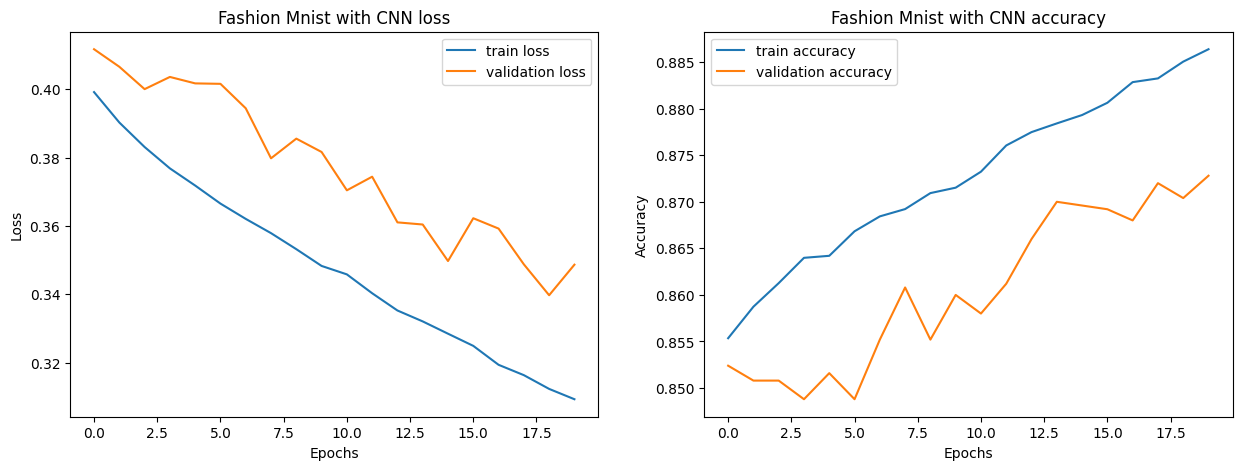

In [49]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 5))

ax_1.plot(train_result.history['loss'], label='train loss')
ax_1.plot(train_result.history['val_loss'], label='validation loss')
ax_1.legend()
ax_1.set_title('Fashion Mnist with CNN loss')
ax_1.set_xlabel('Epochs')
ax_1.set_ylabel('Loss')

ax_2.plot(train_result.history['accuracy'], label='train accuracy')
ax_2.plot(train_result.history['val_accuracy'], label='validation accuracy')
ax_2.legend()
ax_2.set_title('Fashion Mnist with CNN accuracy')
ax_2.set_xlabel('Epochs')
ax_2.set_ylabel('Accuracy')

plt.show()